### imports

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import glob
import re

%matplotlib inline
%config IPCompleter.greedy=True

______

### Funções

In [2]:
def monta_data_frame(algoritmo, delimitador=';', codificacao_arquivo='ISO-8859-1'):
    # path padrao
    path = '../../resultados/' + algoritmo
    all_files = glob.glob(path + "/*.csv") 
    li = []
    df_res = pd.DataFrame(columns=['n', 'maximo', 'minimo', 'media'])

    for filename in all_files:
        # abrindo arquivo csv e transformando em data frame
        df = pd.read_csv(filename, index_col=None, header=0,  delimiter=delimitador, encoding=codificacao_arquivo)
        
        # calculando max, min e media dos tempos
        regex = re.findall(r'[0-9]+', filename)
        n = int(regex[0])
        minimo = df["duracao (ms)"].min()
        maximo = df["duracao (ms)"].max()
        media = df["duracao (ms)"].mean()
        
        # salvando o resultado em um data frame separado
        df_res.loc[len(df_res)] = [n,maximo,minimo,media]
        
    # retorna um data frame ordenado pelo valor de n
    return df_res.sort_values(by=['n'])

def gera_grafico(data_frame, subtitulo, formato="svg", largura=15, altura=8):
    
    # definindo o tamanho da figura
    figure(figsize=(largura,altura))
    
    # plotando o grafico com matplotlib
    plt.plot(data_frame["n"], data_frame["minimo"], label='minimo', alpha=0.5)
    plt.plot(data_frame["n"], data_frame["maximo"], label='maximo', alpha=0.5)
    plt.plot(data_frame["n"], data_frame["media"], label='media', alpha=0.5)
    
    
    plt.legend(title='Legenda: ')
    plt.ylabel('Tempo (ms)')
    plt.xlabel('Quantidade de itens a serem ordenados')
    plt.suptitle(subtitulo)
    plt.savefig(subtitulo+'.'+formato, format=formato)
    
def salva_arquivo(data_frame, nome, separador=';'):
    data_frame.to_csv(path_or_buf=nome+"_analisado.csv", index = None, header=True, sep=separador)

____

### Executando algoritmos

In [5]:
lista = ['heapsort', 'insertionsort', 'introsort', 'mergesort', 'quicksort', 'timsort', 'selectionsort']

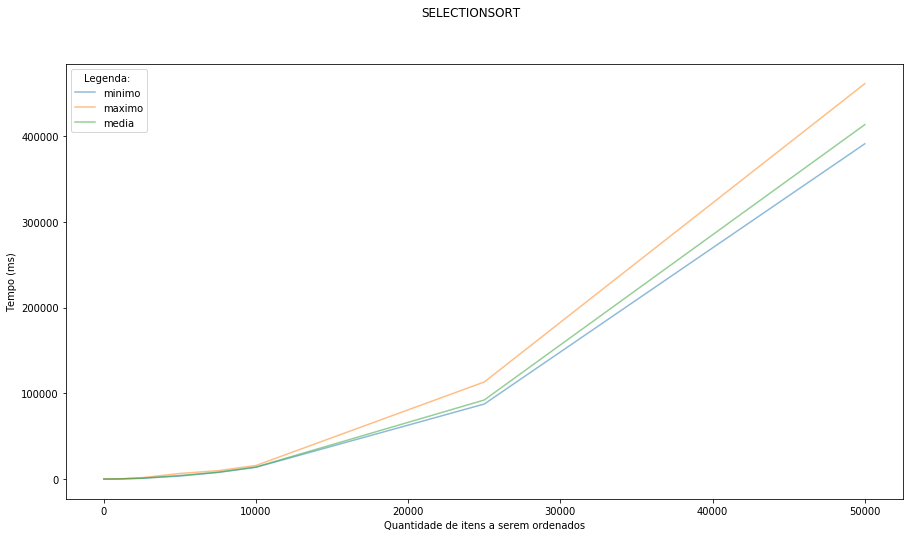

In [6]:
for i in lista:
    df_aux = monta_data_frame(i)
    gera_grafico(df_aux, i.upper())
    salva_arquivo(df_aux, i)